# Notebook on Data Analysis of the Quran
This will mainly contain data analysis of the text of the Quran

In [49]:
import pandas as pd
import oj_scripts as oj
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
importlib.reload(oj)

<module 'oj_scripts' from '/Users/omarjahangir/Projects/ML-Quran/oj_scripts.py'>

## Quran 

In [29]:
Quran_df = oj.Quran()

clean = oj.cleaner(Quran_df['Verse Text'])
Quran_df["Clean Text"] = clean
Quran_df.head()

,Surah Name,Surah Number,Verse Number,Verse Text,Clean Text
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ,بسم الله الرحمن الرحيم
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,الحمد لله رب العالمين
2,الفاتحة,1,3,الرَّحْمَنِ الرَّحِيمِ,الرحمن الرحيم
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ,مالك يوم الدين
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,اياك نعبد واياك نستعين


### Ayahs per surah

In [58]:
verses_per_surah = Quran_df["Surah Name"].groupby(Quran_df['Surah Number']).value_counts().to_list()
verses_per_surah[0:10]

[7, 286, 200, 176, 120, 165, 206, 75, 129, 109]

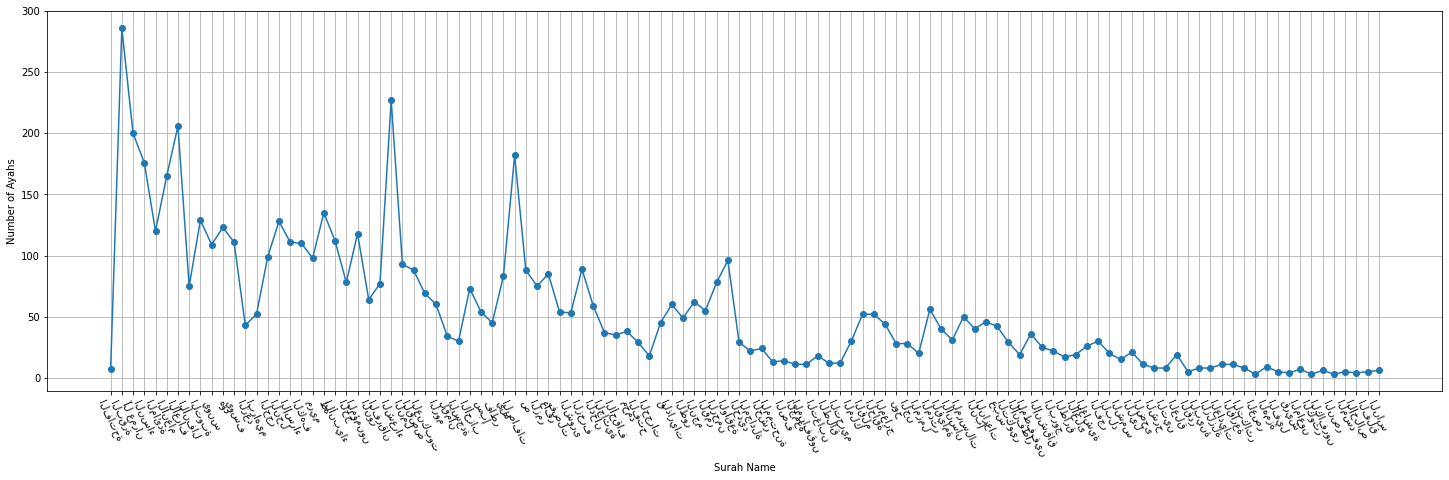

In [174]:
plt.figure(figsize=[25,7])
plt.plot(Quran_df["Surah Name"].unique(),verses_per_surah, 'o-')
plt.xlabel("Surah Name")
plt.ylabel("Number of Ayahs")
plt.xticks(rotation=-65)
plt.grid(True)
plt.show()

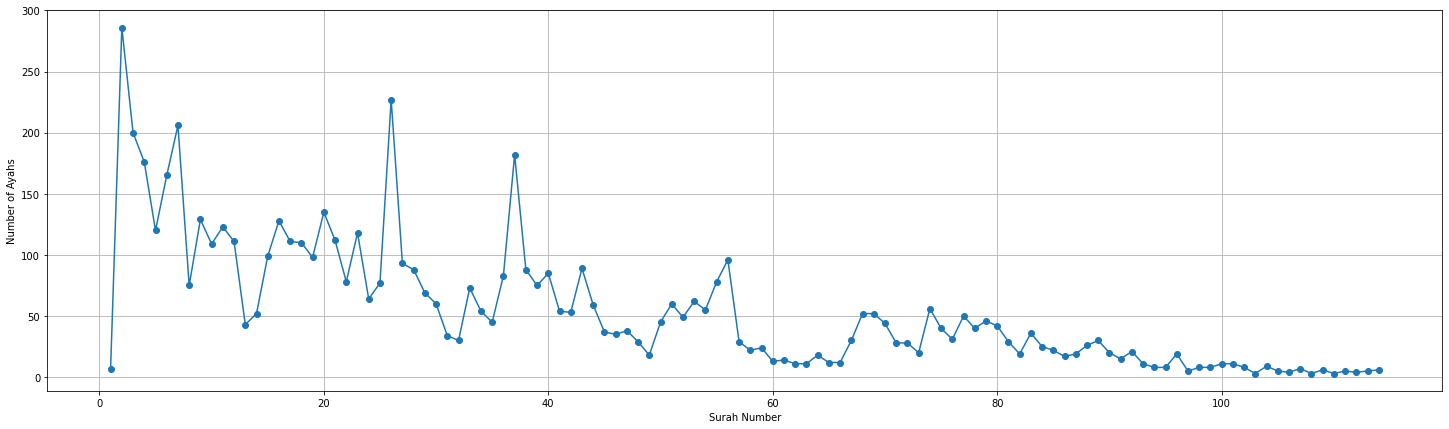

In [172]:
plt.figure(figsize=[25,7])
plt.plot(Quran_df["Surah Number"].unique(),verses_per_surah, 'o-')
plt.xlabel("Surah Number")
plt.ylabel("Number of Ayahs")
plt.grid(True)
plt.show()

### Words and Letters per Surah

In [132]:
surah_num = Quran_df["Surah Number"].unique()

In [150]:
Words = []
Letters = []

num_words = []
num_letters = []


for num in surah_num:
    Surah = Quran_df[Quran_df["Surah Number"] == num]
    Ayahs = list(Surah['Clean Text'])
    
    words = sum([word.split() for word in Ayahs], [])
    num_words.append(len(words))
    Words.append(words)
    
    letters = [letter for word in words for letter in word] #[j for i in words for j in i]
    num_letters.append(len(letters))
    Letters.append(letters)


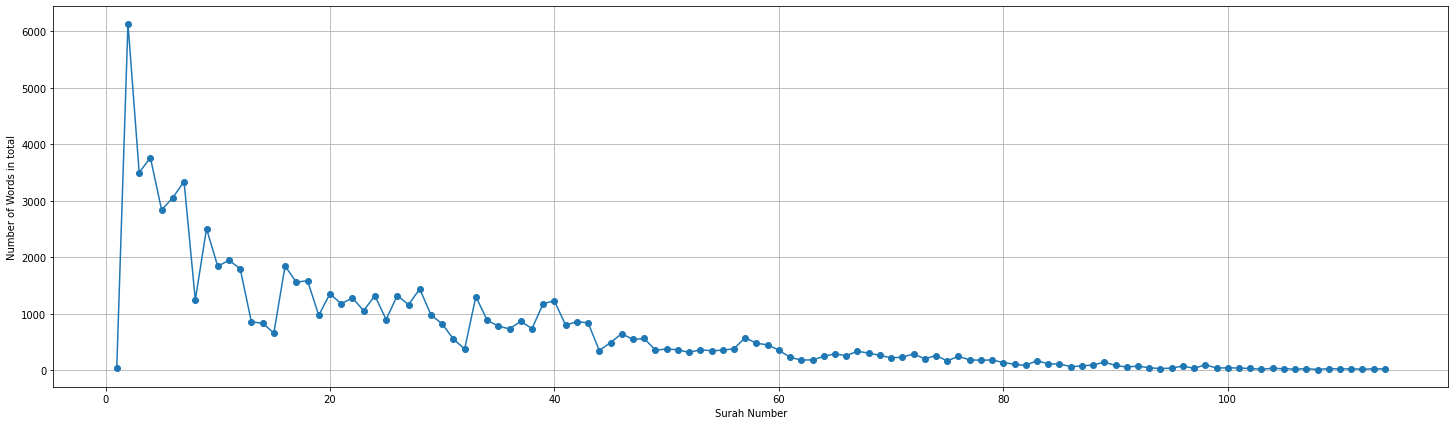

In [171]:
plt.figure(figsize=[25,7])
plt.plot(Quran_df["Surah Number"].unique(),num_words, 'o-')
plt.xlabel("Surah Number")
plt.ylabel("Number of Words in total")
plt.grid(True)
plt.show()

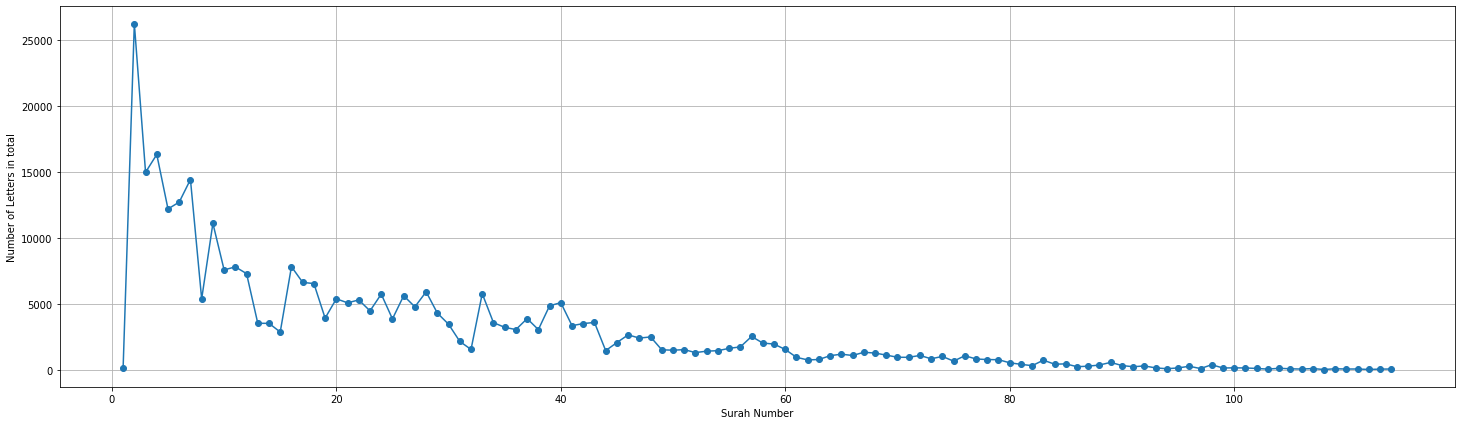

In [170]:
plt.figure(figsize=[25,7])
plt.plot(Quran_df["Surah Number"].unique(),num_letters, 'o-')
plt.xlabel("Surah Number")
plt.ylabel("Number of Letters in total")
plt.grid(True)
plt.show()

In [147]:
norm_words = np.array(num_words)/np.array(verses_per_surah)
norm_letters = np.array(num_letters)/np.array(verses_per_surah)

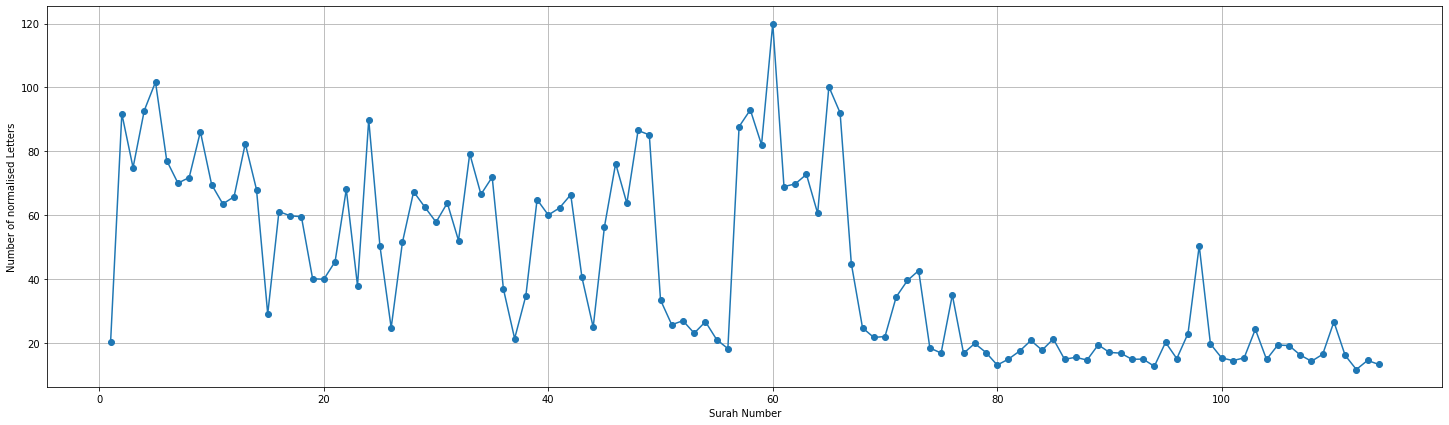

In [169]:
plt.figure(figsize=[25,7])
plt.plot(Quran_df["Surah Number"].unique(),norm_letters, 'o-')
plt.xlabel("Surah Number")
plt.ylabel("Number of normalised Letters")
plt.grid(True)
plt.show()


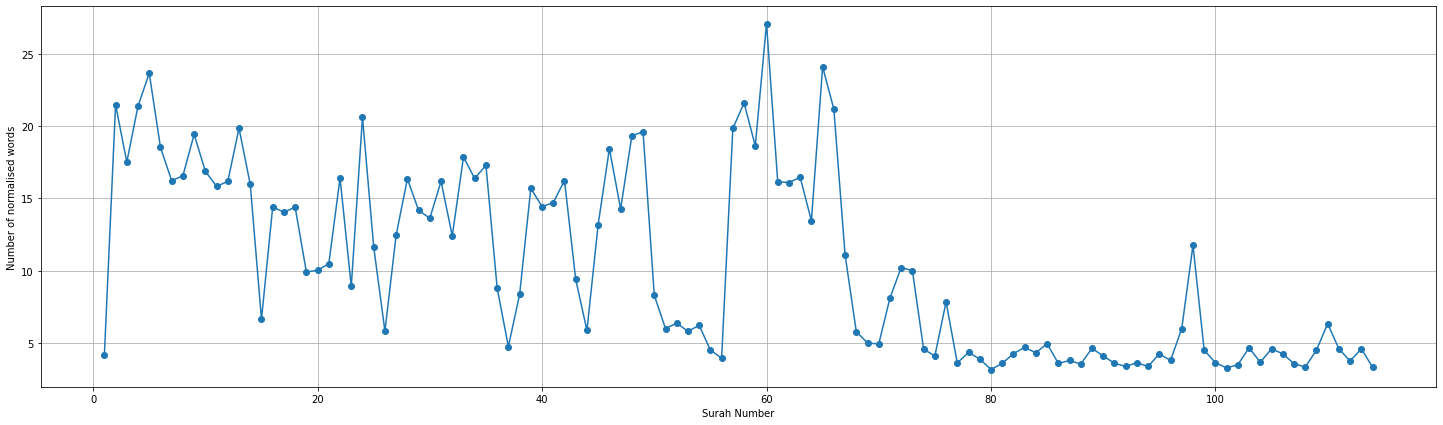

In [168]:
plt.figure(figsize=[25,7])
plt.plot(Quran_df["Surah Number"].unique(),norm_words, 'o-')
plt.xlabel("Surah Number")
plt.ylabel("Number of normalised words")
plt.grid(True)
plt.show()